In [1]:
#importar as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Manipular e organizar dados com pandas.
Realizar cálculos numéricos eficientes com o numpy.
Criar gráficos e visualizações estatísticas (seaborn)(matplotlib).
Criar visualizações customizadas e interativas com o matplotlib.

In [2]:
#leitura dos dados a partir do google drive
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


Essa funcionalidade é muito útil quando você está trabalhando em projetos no Colab, pois facilita o acesso e a utilização de arquivos diretamente do seu Google Drive

In [3]:
df = pd.read_csv('/content/drive/My Drive/dados_rh.csv')


serve para **ler um arquivo CSV**

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
#tamanho do dataset
df.shape

(1470, 35)

Saber o tamanho em termos de número de linhas e número de colunas.

In [7]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


 é uma maneira de verificar os tipos de dados de cada coluna em um DataFrame.

In [8]:
#Verificar se há Valores nulos
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Esse comando ajuda a identificar rapidamente quais colunas têm valores ausentes e quantos valores faltam em cada coluna, o que é útil para limpeza de dados.

In [11]:
#Remoção da coluna YearsSinceLastPromotion
df.drop('YearsSinceLastPromotion',axis=1,inplace=True)

Removida a coluna "YearsSinceLastPromotion"

In [12]:
mediamat= df['StandardHours'].mean()
print("A média de horas trabalhadas é:", mediamat)

A média de horas trabalhadas é: 80.0


Saber a Média Aritimetica das horas trabalhadas

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,17.000000


In [36]:
data = {
    'Age': [36, 45, 30, 38, 41, 29, 33, 39, 60, 28],
    'DailyRate': [102, 600, 750, 800, 850, 500, 1000, 700, 1200, 1100],
    'DistanceFromHome': [5, 10, 3, 4, 8, 6, 2, 5, 7, 4],
}

df = pd.DataFrame(data)

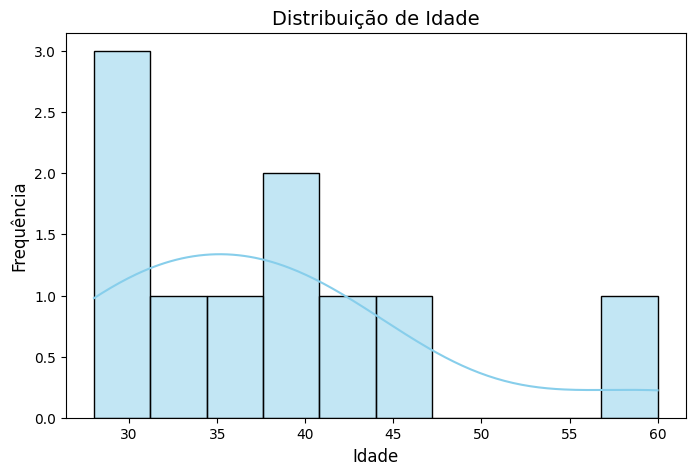

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição de Idade', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


O gráfico tem 10 faixas de idades (10 bins), uma curva de densidade KDE sobreposta ao histograma e a cor azul clara.
O gráfico é titulado "Distribuição de Idade", com rótulos nos eixos X e Y ("Idade" e "Frequência").
O gráfico é exibido na tela com plt.show()

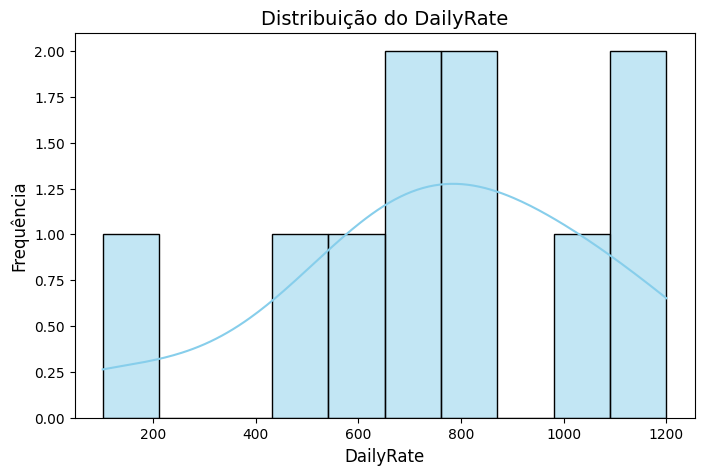

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df['DailyRate'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição do DailyRate', fontsize=14)
plt.xlabel('DailyRate', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


O gráfico mostrará como os valores de DailyRate estão distribuídos (quais faixas de valores aparecem com mais frequência)

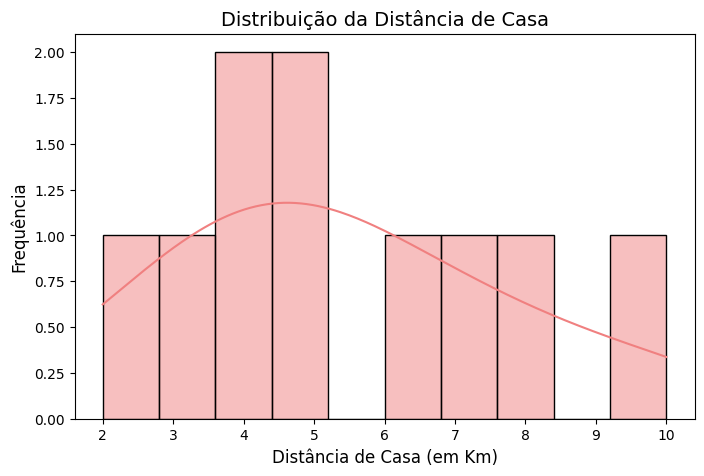

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df['DistanceFromHome'], bins=10, kde=True, color='lightcoral')
plt.title('Distribuição da Distância de Casa', fontsize=14)
plt.xlabel('Distância de Casa (em Km)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

O gráfico vai mostrar como as distâncias de casa estão distribuídas.